In [1]:
import yfinance as yf

In [4]:
# Gold Futures in USD
gold_data_usd = yf.download("GC=F", start="2010-01-01", end="2025-01-01")

C:\Users\Ajith G\AppData\Local\Temp\ipykernel_5072\4175668240.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold_data_usd = yf.download("GC=F", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [5]:
gold_data_usd.head()

Price,Close,High,Low,Open,Volume
Ticker,GC=F,GC=F,GC=F,GC=F,GC=F
Date,,,,,
2010-01-04,1117.699951,1122.300049,1097.099976,1117.699951,184
2010-01-05,1118.099976,1126.500000,1115.000000,1118.099976,53
2010-01-06,1135.900024,1139.199951,1120.699951,1135.900024,363
2010-01-07,1133.099976,1133.099976,1129.199951,1133.099976,56
2010-01-08,1138.199951,1138.199951,1122.699951,1138.199951,54


In [8]:
# USD to INR exchange rate
usd_inr = yf.download("USDINR=X", start="2010-01-01", end="2025-01-01")

C:\Users\Ajith G\AppData\Local\Temp\ipykernel_5072\2964467885.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  usd_inr = yf.download("USDINR=X", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


In [9]:
usd_inr.head()

Price,Close,High,Low,Open,Volume
Ticker,USDINR=X,USDINR=X,USDINR=X,USDINR=X,USDINR=X
Date,,,,,
2010-01-01,46.610001,46.645000,46.400002,46.400002,0
2010-01-04,46.287998,46.610001,46.223000,46.610001,0
2010-01-05,46.119999,46.287998,46.088001,46.287998,0
2010-01-06,45.720001,46.180000,45.700001,46.147999,0
2010-01-07,45.688000,45.877998,45.557999,45.737999,0


In [34]:
import pandas as pd

# Align dates
combined = pd.DataFrame()
combined['Gold_USD'] = gold_data_usd['Close']
combined['USDINR'] = usd_inr['Close']

In [35]:
combined.head()

,Gold_USD,USDINR
Date,,
2010-01-04,1117.699951,46.287998
2010-01-05,1118.099976,46.119999
2010-01-06,1135.900024,45.720001
2010-01-07,1133.099976,45.688000
2010-01-08,1138.199951,45.518002


In [36]:
combined.dropna(inplace=True)

In [37]:
combined['Gold_INR'] = combined['Gold_USD'] * combined['USDINR']

In [38]:
combined['24K_per_gram'] = (combined['Gold_USD'] * combined['USDINR']) / 31.1035

In [39]:
combined['24K_8_gram'] = combined['24K_per_gram'] * 8

In [40]:
combined['22K_per_gram'] = combined['24K_per_gram'] * (22 / 24)

In [41]:
combined['22K_8_gram'] = combined['24K_per_gram'] * 8

In [42]:
combined.head()

,Gold_USD,USDINR,Gold_INR,24K_per_gram,24K_8_gram,22K_per_gram,22K_8_gram
Date,,,,,,,
2010-01-04,1117.699951,46.287998,51736.093327,1663.352784,13306.822275,1524.740052,13306.822275
2010-01-05,1118.099976,46.119999,51566.769680,1657.908907,13263.271254,1519.749831,13263.271254
2010-01-06,1135.900024,45.720001,51933.350503,1669.694745,13357.557960,1530.553516,13357.557960
2010-01-07,1133.099976,45.688000,51769.071373,1664.413052,13315.304419,1525.711965,13315.304419
2010-01-08,1138.199951,45.518002,51808.587149,1665.683513,13325.468105,1526.876554,13325.468105


In [43]:
combined.tail()

,Gold_USD,USDINR,Gold_INR,24K_per_gram,24K_8_gram,22K_per_gram,22K_8_gram
Date,,,,,,,
2024-12-24,2620.000000,85.098900,222959.117584,7168.296738,57346.373902,6570.938676,57346.373902
2024-12-26,2638.800049,85.413399,225388.880773,7246.415380,57971.323040,6642.547432,57971.323040
2024-12-27,2617.199951,85.260902,223144.829611,7174.267514,57394.140109,6576.411888,57394.140109
2024-12-30,2606.100098,85.386002,222524.467074,7154.322410,57234.579279,6558.128876,57234.579279
2024-12-31,2629.199951,85.786598,225550.119813,7251.599332,58012.794654,6647.299387,58012.794654


In [23]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3766 entries, 2010-01-04 to 2024-12-31
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gold_USD             3766 non-null   float64
 1   USDINR               3766 non-null   float64
 2   Gold_INR             3766 non-null   float64
 3   Gold_INR_per_gram    3766 non-null   float64
 4   Gold_INR_per_8_gram  3766 non-null   float64
dtypes: float64(5)
memory usage: 176.5 KB


In [44]:
combined.to_csv('goldRate_data.csv', index=False)

### Train the model to predict the future Gold price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('goldRate_data.csv', parse_dates=True)

In [3]:
df.head()

,Gold_USD,USDINR,Gold_INR,24K_per_gram,24K_8_gram,22K_per_gram,22K_8_gram
0,1117.699951,46.287998,51736.093327,1663.352784,13306.822275,1524.740052,13306.822275
1,1118.099976,46.119999,51566.769680,1657.908907,13263.271254,1519.749831,13263.271254
2,1135.900024,45.720001,51933.350503,1669.694745,13357.557960,1530.553516,13357.557960
3,1133.099976,45.688000,51769.071373,1664.413052,13315.304419,1525.711965,13315.304419
4,1138.199951,45.518002,51808.587149,1665.683513,13325.468105,1526.876554,13325.468105


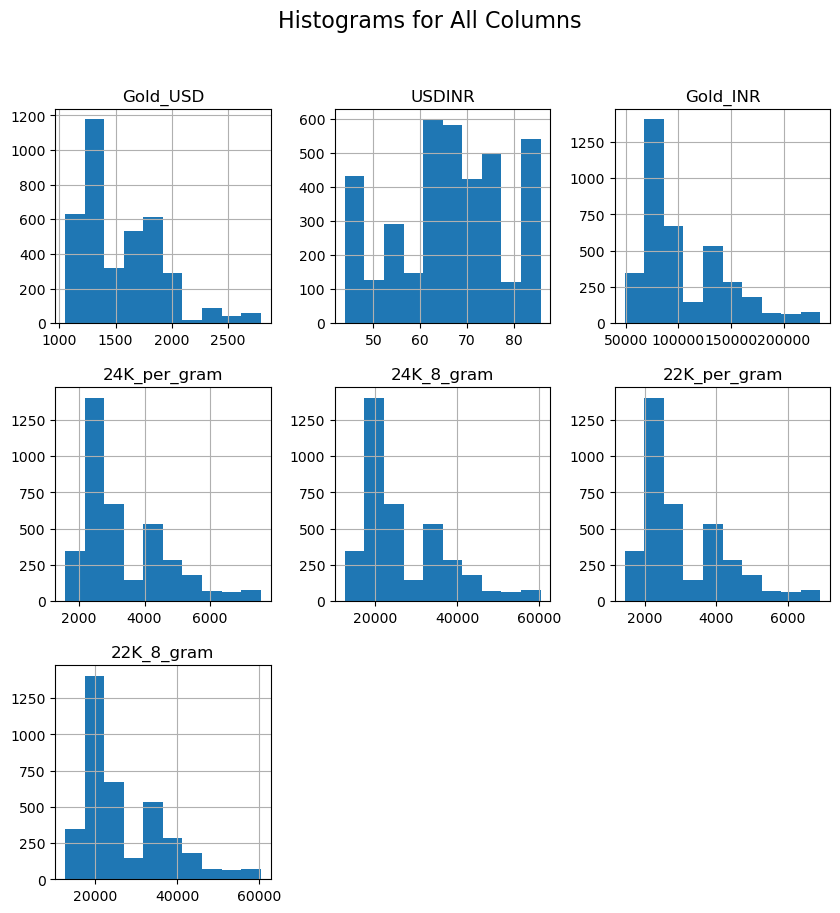

In [4]:
df.hist(figsize=(10, 10), bins=10)
plt.suptitle("Histograms for All Columns", fontsize=16)
plt.show()

In [5]:
target = '22K_per_gram'
features = ['Gold_USD', 'USDINR']

In [6]:
for lag in range(1, 4):  # Lag 1 to 3 days
    df[f'{target}_lag_{lag}'] = df[target].shift(lag)

df.dropna(inplace=True)

In [7]:
df.head()

,Gold_USD,USDINR,Gold_INR,24K_per_gram,24K_8_gram,22K_per_gram,22K_8_gram,22K_per_gram_lag_1,22K_per_gram_lag_2,22K_per_gram_lag_3
3,1133.099976,45.688000,51769.071373,1664.413052,13315.304419,1525.711965,13315.304419,1530.553516,1519.749831,1524.740052
4,1138.199951,45.518002,51808.587149,1665.683513,13325.468105,1526.876554,13325.468105,1525.711965,1530.553516,1519.749831
5,1150.699951,45.358002,52193.450352,1678.057143,13424.457145,1538.219048,13424.457145,1526.876554,1525.711965,1530.553516
6,1128.900024,45.618000,51498.161348,1655.703099,13245.624794,1517.727841,13245.624794,1538.219048,1526.876554,1525.711965
7,1136.400024,45.487999,51692.563131,1661.953257,13295.626057,1523.457152,13295.626057,1517.727841,1538.219048,1526.876554


- Handle missing values - No        (Because in this dataset there is no missing value)
- Handle Imbalanced dataset - No    (Because in this dataset there is no imbalanced data)
- Handle outliers - Seen            (as the boxplot shoe some outliers)
- Encode categorical features - No  (as our dataset is no categorical)
- Normalization vs Standardisation - standardize

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Gold_USD', 'USDINR', f'{target}_lag_1', f'{target}_lag_2', f'{target}_lag_3']]
y = df[target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [12]:
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [13]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 18.576007642457295


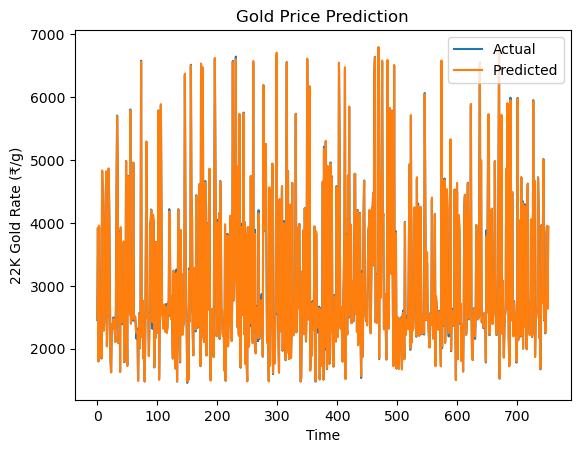

In [14]:
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Gold Price Prediction")
plt.xlabel("Time")
plt.ylabel("22K Gold Rate (₹/g)")
plt.show()

### MLOPS

- save the trained model

In [16]:
import pickle
import os
os.makedirs('../model/Forest', exist_ok=True)

In [17]:
with open('../model/Forest/model.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Model saved successfully")

Model saved successfully
